<a href="https://colab.research.google.com/github/NastyaShanova/My_First_Test_Repo/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [2]:
# 2. Получение и чтение Excel файла из облака
url = "https://drive.google.com/uc?export=download&id=130uKatSQ7Tpm4cAED2Q5H5C8WQSdDm8R"

# чтение данных, разделитель столбцов можно не указывать, Pandas при чтении XLS файла сам его определит; 
# имен у столбцов в исходном файле нет, поэтому нужно указать header = None.
input_df = pd.read_excel(url, header = None) 

# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()

,0
0,"Wind, m/s"
1,15.18
2,15.84
3,16.6
4,14.98


In [3]:
# 3. Берем только временной ряд скорости ветра в м/с
# iloc - выделяет из таблицы указанный фрагмент, в данном случае все строки и только первый столбец
wind_speed = input_df.iloc[1: , 0].values


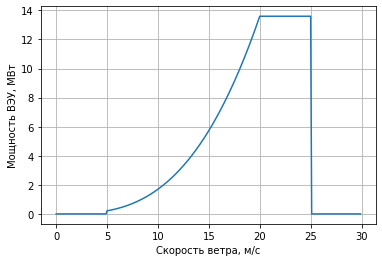

In [4]:
# 5. Зададим зависимость среднечасовой мощности, вырабатываемой ВЭУ, от средней скорости ветра
def wind_speed_to_power(speed):
  min_speed = 5
  max_speed = 20
  critical_speed = 25
  
  # выработка равна нулю, если скорость ветра выше критической или ниже минимальной
  # поэтому обнуляем такую скорость
  speed_tmp = np.where(np.logical_or(speed > critical_speed, speed < min_speed), 0, speed)

  # если скорость выше максимальной, то выработка не будет расти, добавляем ограничение сверху 
  speed_tmp = np.clip(speed_tmp, a_min = None, a_max = max_speed)

  # на рабочем участке от min_speed до max_speed мощность пропорциональна кубу скорости
  power = 0.0017 * (speed_tmp) ** 3
  return power

# отдельно создается график зависимости выработки от скорости ветра

x = np.arange(0, 30, 0.1)
fig, ax = plt.subplots()
ax.plot(x, wind_speed_to_power(x))
ax.grid(True)
ax.set_xlabel('Скорость ветра, м/с') 
ax.set_ylabel('Мощность ВЭУ, МВт')
plt.show()

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(x)), wind_speed_to_power(x), line_width = 2)

show(p)


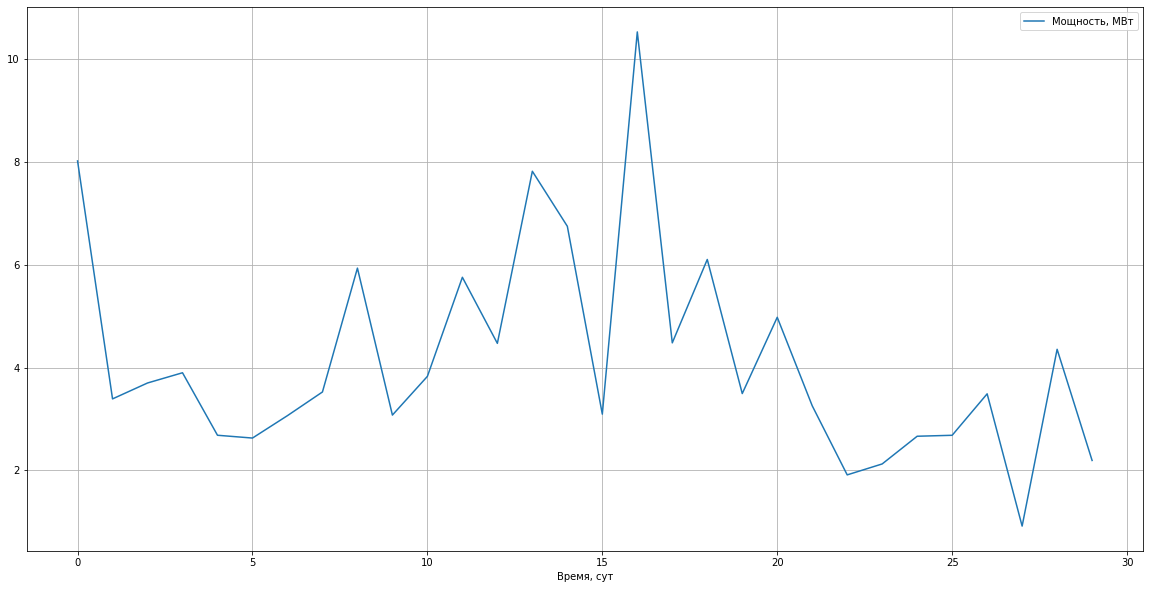

In [5]:
# График среднесуточной выработки ВЭС
power_30d = []
def wind_speed_to_power(speed):
  min_speed = 5
  max_speed = 20
  critical_speed = 25
  
  # выработка равна нулю, если скорость ветра выше критической или ниже минимальной
  # поэтому обнуляем такую скорость
  speed_tmp = np.where(np.logical_or(speed > critical_speed, speed < min_speed), 0, speed)

  # если скорость выше максимальной, то выработка не будет расти, добавляем ограничение сверху 
  speed_tmp = np.clip(speed_tmp, a_min = None, a_max = max_speed)

  # на рабочем участке от min_speed до max_speed мощность пропорциональна кубу скорости
  power = 0.0017 * (speed_tmp) ** 3
  power_30d.append(power)
  return power
 
wind_speed_to_power(wind_speed)
power_30d = power_30d[0]

k = 0
for i in range(len(power_30d)):
  power_30d[i] = sum(power_30d[k:k+24])/24
  k+=24

power_30d = power_30d[:len(wind_speed)//24]


fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(power_30d)

ax.grid(True)
ax.set_xlabel('Время, сут') 
ax.legend(['Мощность, МВт'])
plt.show()


from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(power_30d)), power_30d, line_width = 2)

show(p)
